In [1]:
import xarray as xr
import pandas as pd
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
from ens_util import *
from math import isnan,pi,exp
from sklearn.calibration import calibration_curve
plt.rcParams['figure.figsize'] = [9, 9]

In [2]:
data_files = glob('data_crop*.nc')
coordx = [258,260]
coordy = [63,65]
thresh = 0.2
data = build_datadf(data_files,coordx,coordy)
(fr15,fr30,fr45,fr60) = build_benchmark_fractions(data_files,data.index,thresh)
fr = [fr15,fr30,fr45,fr60]

data_crop_04_02.nc
data_crop_04_05.nc
data_crop_04_09.nc
data_crop_04_10.nc
data_crop_04_11.nc
data_crop_04_12.nc
data_crop_04_15.nc
data_crop_04_18.nc
data_crop_04_19.nc
data_crop_04_20.nc
data_crop_04_21.nc
data_crop_04_22.nc
data_crop_04_25.nc
data_crop_04_26.nc
data_crop_05_05.nc
data_crop_05_06.nc
data_crop_05_07.nc
data_crop_05_08.nc
data_crop_05_09.nc
data_crop_05_19.nc
data_crop_05_20.nc
data_crop_05_21.nc
data_crop_05_22.nc
data_crop_05_23.nc
data_crop_05_24.nc
data_crop_05_25.nc
data_crop_05_29.nc
data_crop_05_30.nc
data_crop_06_03.nc
data_crop_06_10.nc
data_crop_06_11.nc
data_crop_06_12.nc
data_crop_06_14.nc
data_crop_06_15.nc
data_crop_06_16.nc
data_crop_06_17.nc
data_crop_06_18.nc
data_crop_06_19.nc
data_crop_06_22.nc


In [3]:
data_bin = data.mask(data<thresh,other=1)
data_bin = data_bin.mask(data_bin!=1.0,other=0)
print(data)

                            0         1
2014-04-02 16:30:00  0.035458  0.021084
2014-04-02 16:45:00  0.028111  0.030864
2014-04-02 17:00:00  0.025902  0.028544
2014-04-02 17:15:00  0.036538  0.029718
2014-04-02 17:30:00  0.037920  0.038255
2014-04-02 17:45:00  0.064618  0.055072
2014-04-02 18:00:00  0.131268  0.109426
2014-04-02 18:30:00  0.100755  0.112721
2014-04-02 18:45:00  0.128212  0.104692
2014-04-02 19:00:00  0.065097  0.070947
2014-04-02 19:15:00  0.096423  0.093866
2014-04-02 19:30:00  0.138886  0.102686
2014-04-02 19:45:00  0.132562  0.142320
2014-04-02 20:00:00  0.188426  0.182554
2014-04-02 20:15:00  0.121973  0.138402
2014-04-02 20:30:00  0.118844  0.062224
2014-04-02 21:00:00  0.086646  0.082583
2014-04-02 21:30:00  0.080011  0.079279
2014-04-02 21:45:00  0.087090  0.086479
2014-04-02 22:00:00  0.099160  0.126302
2014-04-02 22:15:00  0.072448  0.076457
2014-04-02 22:30:00  0.076665  0.061948
2014-04-05 16:30:00  0.029432  0.032695
2014-04-05 16:45:00  0.022728  0.022373


In [4]:
coord=0
ytrue = data_bin.values[:,coord]

yprob15 = fr15.loc[data_bin.index.values].values[:,0].astype(np.float)
yprob30 = fr30.loc[data_bin.index.values].values[:,0].astype(np.float)
yprob45 = fr45.loc[data_bin.index.values].values[:,0].astype(np.float)
yprob60 = fr60.loc[data_bin.index.values].values[:,0].astype(np.float)

valid15 = [i for i in range(len(yprob15)) if not np.isnan(yprob15[i])]
valid30 = [i for i in range(len(yprob30)) if not np.isnan(yprob30[i])]
valid45 = [i for i in range(len(yprob45)) if not np.isnan(yprob45[i])]
valid60 = [i for i in range(len(yprob60)) if not np.isnan(yprob60[i])]

ptrue15,ppred15 = calibration_curve(ytrue[valid15],yprob15[valid15])
ptrue30,ppred30 = calibration_curve(ytrue[valid30],yprob30[valid30])
ptrue45,ppred45 = calibration_curve(ytrue[valid45],yprob45[valid45])
ptrue60,ppred60 = calibration_curve(ytrue[valid60],yprob60[valid60])

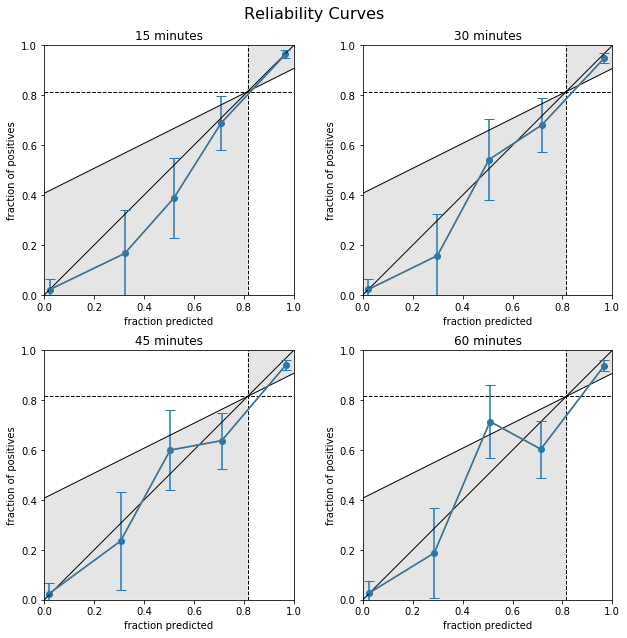

In [9]:
obar = 0.815 # similar obar for all outlook times

xmin = 0
ymin = xmin
xmax = 1
ymax = xmax
x = [xmin,xmax]
y = [ymin,ymax]
nsy = [obar/2,(1+obar)/2]
rows = 2; cols = 2;
fig,axarr = plt.subplots(rows,cols)
for r in range(rows):
    for c in range(cols):
        axarr[r,c].set_aspect('equal','box')
        axarr[r,c].axis([xmin,xmax,ymin,ymax])
        axarr[r,c].plot(x,y,c='k',lw=1)
        axarr[r,c].set_xlabel("fraction predicted")
        axarr[r,c].set_ylabel("fraction of positives")
        axarr[r,c].axhline(obar,ls='--',c='k',lw=1)
        axarr[r,c].axvline(obar,ls='--',c='k',lw=1)
        axarr[r,c].plot(x,nsy,c='k',lw=1)
        axarr[r,c].fill_between([0,obar],0,[obar/2,obar],facecolor='k',alpha=0.1)
        axarr[r,c].fill_between([obar,1],[obar,(1+obar)/2],1,facecolor='k',alpha=0.1)

n = np.array([46,18,36,70,502])
err15 = 1.96*np.sqrt(ptrue15*(1-ptrue15)/n)
err30 = 1.96*np.sqrt(ptrue30*(1-ptrue30)/n)
err45 = 1.96*np.sqrt(ptrue45*(1-ptrue45)/n)
err60 = 1.96*np.sqrt(ptrue60*(1-ptrue60)/n)        
        
axarr[0,0].scatter(ppred15,ptrue15)
axarr[0,0].errorbar(ppred15,ptrue15,err15,capsize=5)
axarr[0,0].plot(ppred15,ptrue15)

axarr[0,1].scatter(ppred30,ptrue30)
axarr[0,1].errorbar(ppred30,ptrue30,err30,capsize=5)
axarr[0,1].plot(ppred30,ptrue30)

axarr[1,0].scatter(ppred45,ptrue45)
axarr[1,0].errorbar(ppred45,ptrue45,err45,capsize=5)
axarr[1,0].plot(ppred45,ptrue45)

axarr[1,1].scatter(ppred60,ptrue60)
axarr[1,1].errorbar(ppred60,ptrue60,err60,capsize=5)
axarr[1,1].plot(ppred60,ptrue60)


axarr[0,0].set_title("15 minutes")
axarr[0,1].set_title("30 minutes")
axarr[1,0].set_title("45 minutes")
axarr[1,1].set_title("60 minutes")

fig.tight_layout()
fig.suptitle("Reliability Curves",fontsize=16)
fig.subplots_adjust(top=0.92)
plt.show()

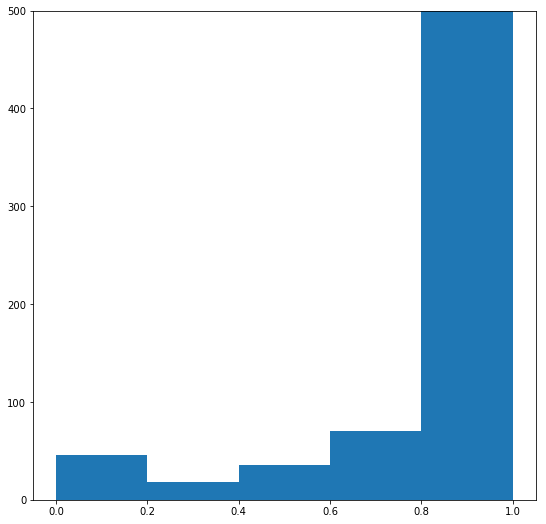

[ 46.  18.  36.  70. 502.]


In [8]:
n = plt.hist(yprob15[valid15],bins=5)
plt.ylim([0,500])
plt.show()
print(n[0])